import the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('Crop_recommendation.csv')

df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


outlier identification, feature selection = data preprocessing

In [2]:
df.shape

(2200, 8)

In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

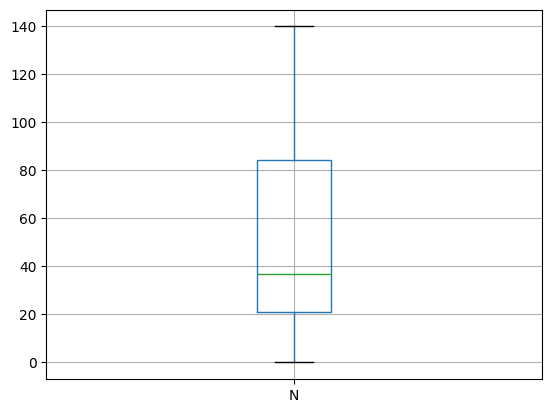

In [5]:
df.boxplot(column='N',grid=True)
plt.show()

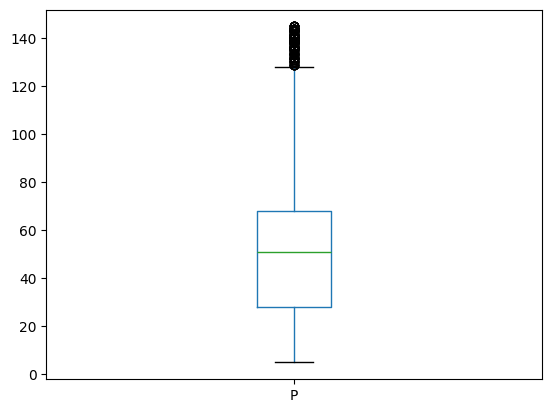

In [6]:
df.boxplot(column='P',grid=False)
plt.show()

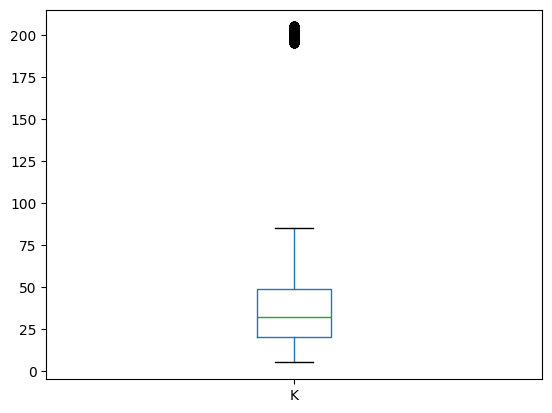

In [7]:
df.boxplot(column='K',grid=False)
plt.show()

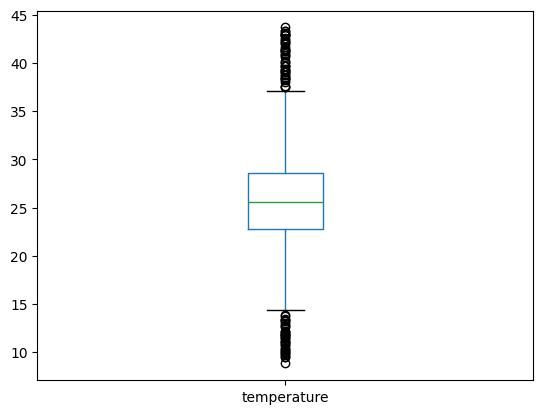

In [8]:
df.boxplot(column='temperature',grid=False)
plt.show()

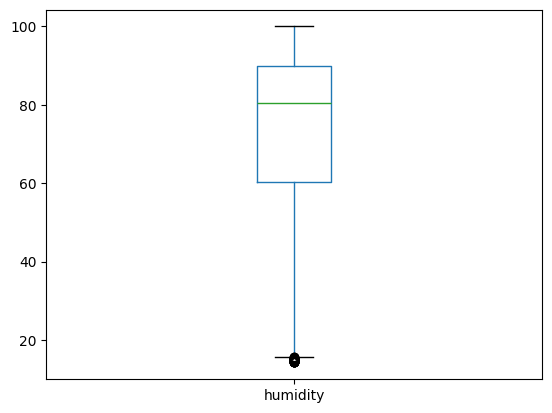

In [9]:
df.boxplot(column='humidity',grid=False)
plt.show()

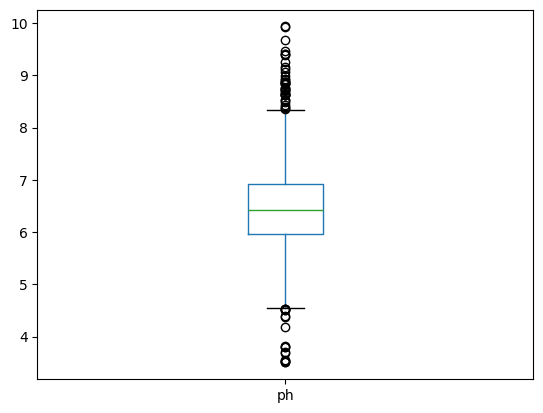

In [10]:
df.boxplot(column='ph',grid=False)
plt.show()

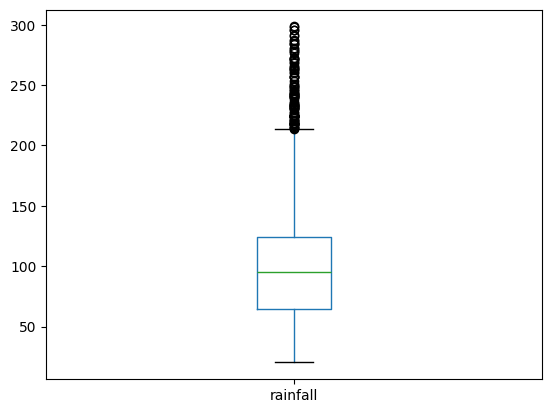

In [11]:
df.boxplot(column='rainfall',grid=False)
plt.show()

In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [14]:
df.size

17600

In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
X=df.drop(['label'],axis='columns')
y=df.label 

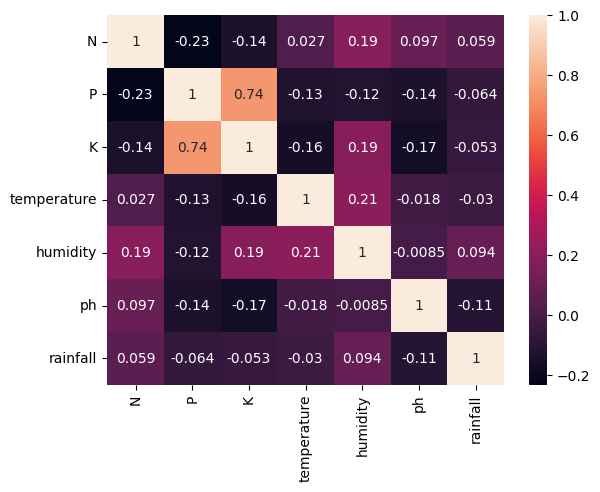

In [17]:
import seaborn as sb
sb.heatmap(X.corr(),annot=True)
plt.show()

In [18]:
X.tail(5)

,N,P,K,temperature,humidity,ph,rainfall
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293
2199,104,18,30,23.603016,60.396475,6.779833,140.937041


data selection

In [19]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

data scaling

In [20]:
X_Scaled=Scaler.fit_transform(X)
X_Scaled

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [21]:
print(len(X),len(y))

2200 2200


In [22]:
X.shape

(2200, 7)

In [23]:
X.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


data splitting

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.25,stratify=y,random_state=20,shuffle=True)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=20,shuffle=True)

In [26]:
print(len(X_train),len(y_test))

1650 550


model building

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
#model=KNeighborsClassifier()
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
model3=SVC()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9690909090909091

In [30]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

model score

In [31]:
print("Random Forest:",model.score(X_train,y_train),"\n","Decision Tree:",model2.score(X_train,y_train))
print("Random Forest:",model.score(X_test,y_test),"\n","Decision Tree:",model2.score(X_test,y_test))
print("SVC:",model3.score(X_test,y_test),"\n","DSVC:",model3.score(X_train,y_train))

Random Forest: 1.0 
 Decision Tree: 1.0
Random Forest: 0.9927272727272727 
 Decision Tree: 0.9818181818181818
SVC: 0.9690909090909091 
 DSVC: 0.9812121212121212


accuracy score

In [32]:
from sklearn.metrics  import accuracy_score
y_predicted=model.predict(X_test)
y_predicted[:6]
accuracyscore=accuracy_score(y_test,y_predicted)
accuracyscore

0.9927272727272727

In [33]:
from sklearn.metrics  import accuracy_score
y_predicted2=model2.predict(X_test)
y_predicted2[:6]
accuracyscore2=accuracy_score(y_test,y_predicted2)
accuracyscore2

0.9818181818181818

In [34]:
y_predicted3=model3.predict(X_test)
y_predicted3[:6]
accuracyscore3=accuracy_score(y_test,y_predicted3)
accuracyscore3

0.9690909090909091

classification report

In [35]:
from sklearn.metrics import classification_report
cl_report=classification_report(y_test,y_predicted)
print(cl_report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        25
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        25
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        25
        jute       0.89      0.96      0.92        25
 kidneybeans       1.00      1.00      1.00        25
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        25
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        25
      papaya       1.00    

In [36]:
cl_report_2=classification_report(y_test,y_predicted2)
print(cl_report_2)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       0.96      1.00      0.98        25
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      0.96      0.98        25
      coffee       1.00      0.96      0.98        25
      cotton       1.00      1.00      1.00        25
      grapes       1.00      1.00      1.00        25
        jute       0.89      0.96      0.92        25
 kidneybeans       1.00      1.00      1.00        25
      lentil       1.00      0.88      0.94        25
       maize       0.96      1.00      0.98        25
       mango       1.00      1.00      1.00        25
   mothbeans       0.89      1.00      0.94        25
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        25
      orange       0.96      1.00      0.98        25
      papaya       1.00    

In [37]:
cl_report_3=classification_report(y_test,y_predicted3)
print(cl_report_3)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        25
   blackgram       0.93      1.00      0.96        25
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        25
      coffee       1.00      0.96      0.98        25
      cotton       0.96      1.00      0.98        25
      grapes       1.00      1.00      1.00        25
        jute       0.74      1.00      0.85        25
 kidneybeans       0.96      1.00      0.98        25
      lentil       0.89      0.96      0.92        25
       maize       1.00      0.96      0.98        25
       mango       1.00      1.00      1.00        25
   mothbeans       0.95      0.84      0.89        25
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        25
      papaya       1.00    

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,

In [39]:
cm2=confusion_matrix(y_test,y_predicted2)
cm2

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,

In [40]:
cm3=confusion_matrix(y_test,y_predicted3)
cm3

array([[25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,

confusion matrix

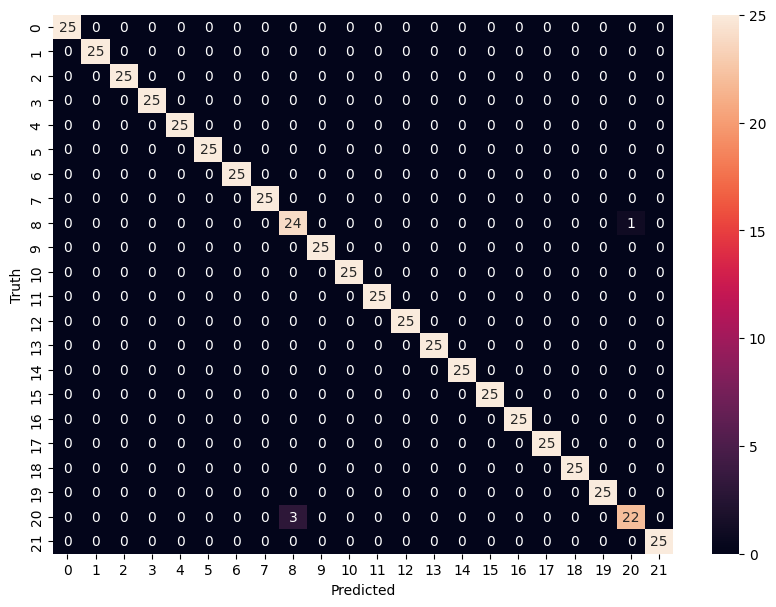

In [41]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

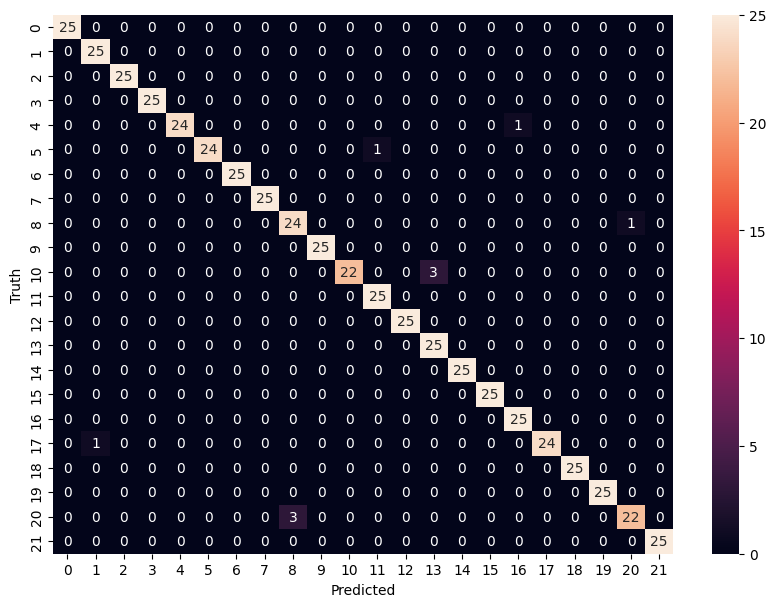

In [42]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

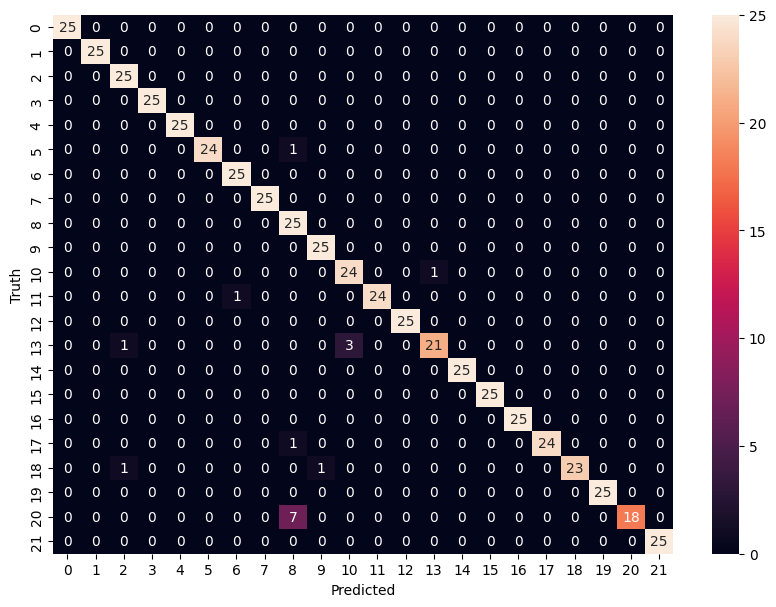

In [43]:
plt.figure(figsize=(10,7))
sb.heatmap(cm3,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

cross val score

In [44]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_test,y_test,cv=5)
scores.mean()

0.9872727272727273

In [45]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,X_test,y_test,cv=5)
scores.mean()

0.9836363636363636

In [46]:
scores=cross_val_score(model3,X_test,y_test,cv=5)
scores.mean()

0.9527272727272728

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_predicted)
y_p

array([10,  7,  0, 11,  3,  8, 10, 21, 16,  7,  0, 10, 17, 10,  5, 12,  2,
        9, 12, 12,  0,  0,  3, 10,  8,  7,  0, 21,  5,  8,  8,  9, 19, 17,
        2,  4,  2, 10,  7, 21,  1,  3, 16, 19, 18, 21, 20,  9,  4,  8,  6,
       20, 17, 16,  2,  1, 13, 19,  7, 14,  9, 17,  2, 14, 21, 13, 12, 20,
        6, 17, 21, 21,  9, 11, 16,  2, 20, 18,  0,  1,  2,  4, 17, 14, 18,
        5, 11,  6, 19,  5,  5, 20, 20, 14, 19, 13,  9, 16,  3, 14, 15, 15,
       18, 12,  4, 10, 15, 10,  5,  4,  1, 11,  7, 10,  7, 16,  5,  8,  7,
        7, 14, 11,  7, 18,  8, 18,  7,  8,  6, 12, 15,  2,  7, 13, 10,  2,
        9,  8,  2, 20, 14,  6, 18,  9, 18,  5,  7, 10, 16, 11, 15,  3, 17,
        6,  5, 11, 17, 13, 14, 21, 21, 20, 13,  2,  6,  1,  5, 21,  0,  7,
       13, 18,  1, 16, 11, 17, 10, 14, 20,  4, 14, 16, 16,  0,  7,  3,  1,
       14, 11,  5, 15, 19,  2,  4,  6, 11, 19,  7,  3, 18, 12, 12, 11, 16,
        2,  1,  2,  4,  8,  5, 16,  5, 10, 16, 14, 15, 18,  5,  0, 20,  2,
       15, 16,  2,  0, 17

In [48]:
from sklearn.metrics import r2_score
res=r2_score(y_true=y_t,y_pred=y_p)
res

0.9739808018068887

In [49]:
dfle2=df
dfle2=le.fit_transform(y_test)
y_t=dfle2
y_t
y_p=le.fit_transform(y_predicted2)
y_p
res=r2_score(y_true=y_t,y_pred=y_p)
res

0.9530660643704122

In [50]:
dfle3=df
dfle3=le.fit_transform(y_test)
y_t=dfle3
y_t
y_p=le.fit_transform(y_predicted3)
y_p
res=r2_score(y_true=y_t,y_pred=y_p)
res

0.9269565217391305

In [51]:
from sklearn.metrics import mean_squared_error
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_predicted)
y_p
n=len(y_t)
sum1=sum(((y_t-y_p)**2)/n)
mse=sum1
#mse=mean_squared_error(y_t,y_p)
mse

1.0472727272727274

In [52]:
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_predicted2)
y_p
mse=mean_squared_error(y_t,y_p)
mse

1.8890909090909092

In [53]:
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_predicted3)
y_p
mse=mean_squared_error(y_t,y_p)
mse

2.94

In [54]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

1650 550 1650 550


In [55]:
print(y_test[525:531])

7              rice
679        mungbean
191           maize
1169          mango
2102         coffee
927     pomegranate
Name: label, dtype: object


final prediction

In [56]:
res=model.predict([[34,45,23,29.21780035, 87.93724219,6.54450214,43.1386631]])
sol=res[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
res2=model2.predict([[34,45,23,29.21780035, 87.93724219,6.54450214,43.1386631]])
sol2=res2[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [58]:
res3=model3.predict([[34,45,23,29.21780035, 87.93724219,6.54450214,43.1386631]])
sol3=res3[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [59]:
print("Random Forest:",sol)
print("Decision Tree:",sol2)
print("SVM:",sol3)

Random Forest: mungbean
Decision Tree: mungbean
SVM: mungbean


In [60]:
y_test.value_counts()

label
lentil         25
grapes         25
mungbean       25
mothbeans      25
cotton         25
rice           25
pigeonpeas     25
banana         25
coconut        25
pomegranate    25
kidneybeans    25
blackgram      25
mango          25
coffee         25
papaya         25
orange         25
watermelon     25
jute           25
chickpea       25
maize          25
apple          25
muskmelon      25
Name: count, dtype: int64

file dumping

In [61]:
import pickle
with open('Crop recommendation.pkl','wb') as file:
    pickle.dump(model,file)

In [62]:
import pickle
with open('Crop recommendation2.pkl','wb') as file:
    pickle.dump(model2,file)

In [63]:
with open('Crop recommendation3.pkl','wb') as file:
    pickle.dump(model3,file)

file loading

In [64]:
with open('Crop recommendation.pkl','rb') as file:
    loaded_model1=pickle.load(file)

In [65]:
with open('Crop recommendation2.pkl','rb') as file:
    loaded_model2=pickle.load(file)

In [66]:
with open('Crop recommendation3.pkl','rb') as file:
    loaded_model3=pickle.load(file)

In [67]:
ans=loaded_model3.predict([[2,4,3,32,54,6,76]])
ans[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'mango'

In [68]:
ans=loaded_model1.predict([[2,4,3,32,54,6,76]])
ans[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'mothbeans'

In [69]:
ans=loaded_model2.predict([[2,4,3,32,54,6,76]])
ans[0]

C:\Users\rajsp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'mothbeans'